# Neural Style Transfer
A process that uses NN to apply the artistic style from one image to another

## Process pipeline

1. Download the pre-trained neural style transfer model from **Tensorflow Hub**
2. Load up style and content images into Python using *Tensorflow preprocessing*
3. Apply style transfer and visualize the results.

### Import dependencies and Pretrained model

!pip3 install "tensorflow>=2.0.0"
!pip3 install --upgrade tensorflow-hub
!pip3 install opencv-python

In [10]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

### Preprocess Image and Load

In [7]:
def load_image(img_path):
    img = tf.io.read_file(img_path) # read the file in tensor
    img = tf.image.decode_image(img, channels=3) # make sure image has three channels
    img = tf.image.convert_image_dtype(img, tf.float32) # change the type to float32
    img = img[tf.newaxis, :] # image is in new array
    return img

In [8]:
content_image = load_image('Content/profile.jfif')
style_image = load_image('Style/monet.jpeg')

### Visualize the Output

In [11]:
content_image.shape

TensorShape([1, 200, 200, 3])

<function matplotlib.pyplot.show(close=None, block=None)>

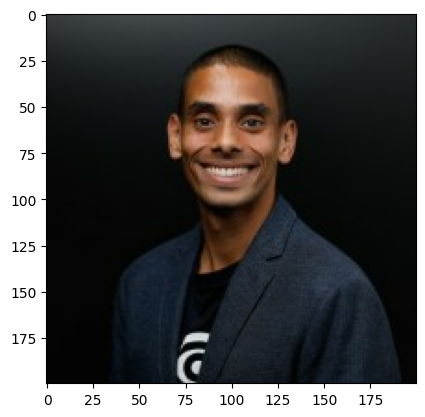

In [9]:
# np.squeeze extract the image from the array
plt.imshow(np.squeeze(content_image)) 
plt.show

### Style Image

In [12]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

<function matplotlib.pyplot.show(close=None, block=None)>

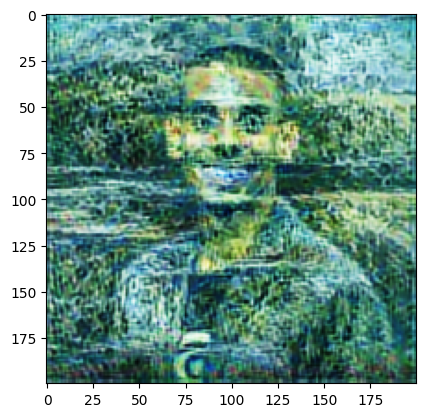

In [13]:
plt.imshow(np.squeeze(stylized_image)) 
plt.show

In [ ]:
# cvtColor will change the default color gamut BGR to RGB
# multiplying by 255 is reversing the normalizing process
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))